<a href="https://colab.research.google.com/github/Shwetacheison/GRIP-Jan2021/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task1: Prediction Using Supervised Learning**

**Submitted By Shweta Cheison**

Task: From the given dataset(https://bit.ly/3kXTdox) predict the percentage of an student based on the no. of study hours.

Ques : What will be predicted score if a student studies for 9.25 hrs in a day?

**Linear Regression**
It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (x) variables, hence called as linear regression.

**Data Preprocessing**



In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#downloading and saving dataset in Data.csv file
!curl https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv -o Data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   212  100   212    0     0    946      0 --:--:-- --:--:-- --:--:--   950


In [3]:
#importing dataset
data=pd.read_csv('Data.csv')

In [4]:
#printing contents of dataset
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


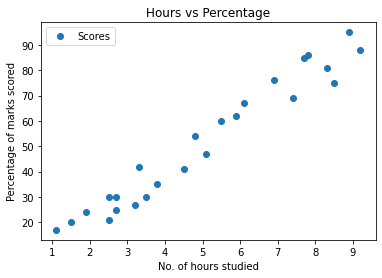

In [5]:
#plotting the distribution
data.plot(x="Hours", y="Scores", style='o')
plt.title("Hours vs Percentage")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage of marks scored")
plt.show()

In [6]:
#correlation coefficients
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
#Extracting dependent and independent variables
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [8]:
#splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#train and test sets after splitting
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [10]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [11]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [12]:
y_test

array([20, 27, 69, 30, 62])

**Training the model**

In [13]:
#Training the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)   #Fitting the model to dataset

print("Training complete")

Training complete


In [14]:
regressor.coef_  #slope of regression line

array([9.91065648])

In [15]:
regressor.intercept_    #intercept of regression

2.018160041434662

In [16]:
#predictions
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
#Evaluating the model
from sklearn import metrics
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Max Error: ", metrics.max_error(y_test,y_pred))

Root Mean Squared Error:  21.598769307217456
Mean Absolute Error:  4.183859899002982
Max Error:  6.732260779489835


In [18]:
df=pd.DataFrame({"Actual ": y_test,"Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visualising the regression line**

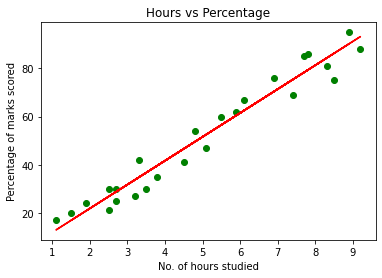

In [19]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#plotting for X and y 
plt.scatter(X, y, color="green")   
plt.plot(X, line, color="red")    
plt.title("Hours vs Percentage")  
plt.xlabel("No. of hours studied")  
plt.ylabel("Percentage of marks scored")  
plt.show()   

In [20]:
#prediction score for studying 9.25hr/day
value=9.25
ans_pred=regressor.predict([[9.25]])
print("No.of study hours/day: ", value )
print("Predicted percentage of marks: ", ans_pred)

No.of study hours/day:  9.25
Predicted percentage of marks:  [93.69173249]
